In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
from matplotlib import style
import matplotlib.dates as mdates
import squarify
import itertools
%matplotlib inline

In [3]:
df = pd.read_csv("music sales.csv")
df.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


In [4]:
df.shape

(2143, 25)

In [5]:
df['Region'].value_counts()

Europe            1019
North  America     766
South America      258
Asia                70
Oceania             30
Name: Region, dtype: int64

In [6]:
region_filter = df.loc[df['Region'].isin(['Asia','Europe'])]
genre_groupby = region_filter.groupby(['Genre']).sum()
sales_sort=genre_groupby.sort_values(by='Quantity', ascending=False)
sales_sort_index=sales_sort.reset_index()

## 1 - Time Series - Sales in the U.S. and Canada

In [13]:
df_US_CA=df[df['Country'].isin(['USA', 'Canada'])].copy()
df_sales =df_US_CA [['Country','Sales','InvoiceDate']]
df_sales['InvoiceDate']= pd.to_datetime(df_sales.InvoiceDate)
df_sales['year_month']=df_sales['InvoiceDate'].map(lambda x: x.strftime('%Y-%m'))
df_sales

C:\Users\lych0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lych0\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country,Sales,InvoiceDate,year_month
12,Canada,0.99,2008-01-06,2008-01
13,Canada,1.98,2008-01-06,2008-01
14,Canada,2.97,2008-01-06,2008-01
15,Canada,2.97,2008-01-06,2008-01
16,Canada,2.97,2008-01-06,2008-01
17,Canada,4.95,2008-01-06,2008-01
18,Canada,4.95,2008-01-06,2008-01
19,Canada,4.95,2008-01-06,2008-01
20,Canada,4.95,2008-01-06,2008-01
21,USA,0.99,2008-01-11,2008-01


In [14]:
USA=df_sales.loc[df_sales['Country']=='USA'].groupby('year_month')['Sales'].sum().to_frame().reset_index()
Canada=df_sales.loc[df_sales['Country']=='Canada'].groupby('year_month')['Sales'].sum().to_frame().reset_index()

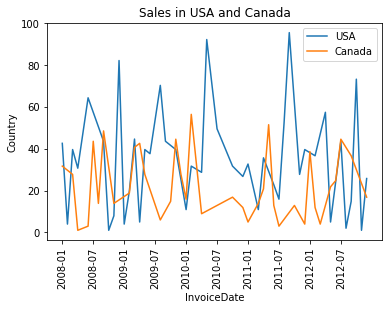

In [15]:
from matplotlib.pyplot import xticks
# combine2_sort_index.plot.line()
months_sorted = list()
for year in range(2008, 2013):
    for month in range(1, 13):
        name = '{}-0{}'.format(year, month) if month < 10 else '{}-{}'.format(year, month)
        months_sorted.append(name)
USA_filtered = USA.copy()
USA_filtered['year_month'] = USA['year_month'].apply(lambda x : months_sorted.index(x))
Canada_filtered = Canada.copy()
Canada_filtered['year_month'] = Canada['year_month'].apply(lambda x : months_sorted.index(x))

plt.plot(USA_filtered['year_month'], USA_filtered['Sales'], linestyle = '-', label = 'USA')
plt.plot(Canada_filtered['year_month'], Canada_filtered['Sales'].values, linestyle = '-', label = 'Canada')

step_size = 6
months_display = list(range(0, len(months_sorted), step_size))
xticks(months_display, months_sorted[0:len(months_sorted):step_size], rotation = 90)
plt.xlabel('InvoiceDate')
plt.ylabel('Country')
plt.title('Sales in USA and Canada')
plt.legend()
plt.show()

## 2 - Tree Map - Sales Distribution by Asia & Europe

In [16]:
#Create new column RSales
df['RSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice,RSales
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99,3.96
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99,3.96
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99,1.98
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99,1.98


In [17]:
#Groupby Region and Country, summing RSales
df_country= df.groupby(['Region','Country'])['RSales'].sum().reset_index()

#Finding Total
df_country['Percentage'] = df_country['RSales']/df_country['RSales'].sum()
df_country.sort_values(by=['Percentage'], ascending=False, inplace=True)
df_country['Percentages'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_country['Percentage']], index = df_country.index)
df_country


,Region,Country,RSales,Percentage,Percentages
19,North America,USA,1527.50,0.230248,23.02%
18,North America,Canada,851.46,0.128345,12.83%
6,Europe,France,562.50,0.084788,8.48%
22,South America,Brazil,523.78,0.078952,7.90%
7,Europe,Germany,421.88,0.063592,6.36%
17,Europe,United Kingdom,301.95,0.045514,4.55%
3,Europe,Czech Republic,269.72,0.040656,4.07%
0,Asia,India,210.91,0.031792,3.18%
14,Europe,Portugal,197.05,0.029702,2.97%
8,Europe,Hungary,168.61,0.025415,2.54%


In [18]:
#Grouby Region, Country and summing RSales
df_country1 = df.groupby(['Region','Country'])['RSales'].sum().reset_index()

#Calculate percentage RSales by its total
df_country1['Percentage'] = df_country1['RSales']/df_country1['RSales'].sum()

#Sort by descending order on Percentage
df_country1.sort_values(by=['Percentage'], ascending=False, inplace=True)

#List percentage to new column 'Percentages' showing with % and change datatype to string
df_country1['Percentages'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_country1['Percentage']], index = df_country1.index)
df_country1['Percentages'].astype(str)

#Reset Index so country with high Percentages will have high index
df_country=df_country1.reset_index()
df_country.head()


,index,Region,Country,RSales,Percentage,Percentages
0,19,North America,USA,1527.50,0.230248,23.02%
1,18,North America,Canada,851.46,0.128345,12.83%
2,6,Europe,France,562.50,0.084788,8.48%
3,22,South America,Brazil,523.78,0.078952,7.90%
4,7,Europe,Germany,421.88,0.063592,6.36%


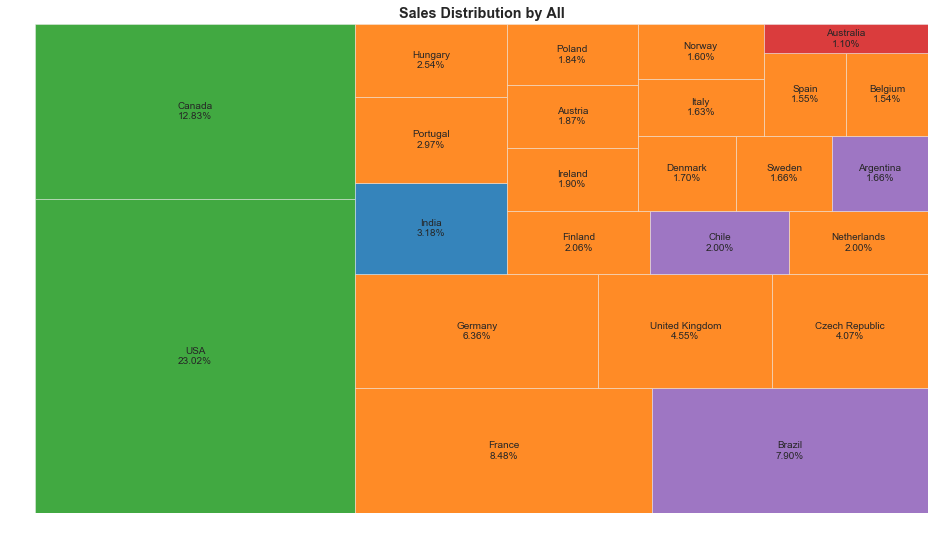

In [19]:
#Formatting for Plotting

#Seaborn and Matplotlib
sns.set()
%matplotlib inline

# Large Plot
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# Use ggplot style
style.use('ggplot')
# Get Axis and Figure
fig, ax = plt.subplots()


#Create code for each region
df_country['Region_cat']=df_country['Region'].astype('category')
df_country['Region_code']=df_country['Region_cat'].cat.codes
df_country


#Create label
df_country['labels']=df_country['Country']+'\n'+df_country['Percentages']



#Set Colormap
cmap = matplotlib.cm.tab10

#Using normalized Min and Max Values to set Colors
mini = min(df_country['Region_code'].index)
maxi = max(df_country['Region_code'].index)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(value) for value in df_country['Region_code']]


#Plot Treemap
ax = squarify.plot(sizes=df_country['Percentage'], label=df_country['labels'], ax=ax, alpha =0.9, color=colors)
plt.axis('off')
plt.title('Sales Distribution by All', fontweight="bold")
plt.show()


## 3 - Heat map

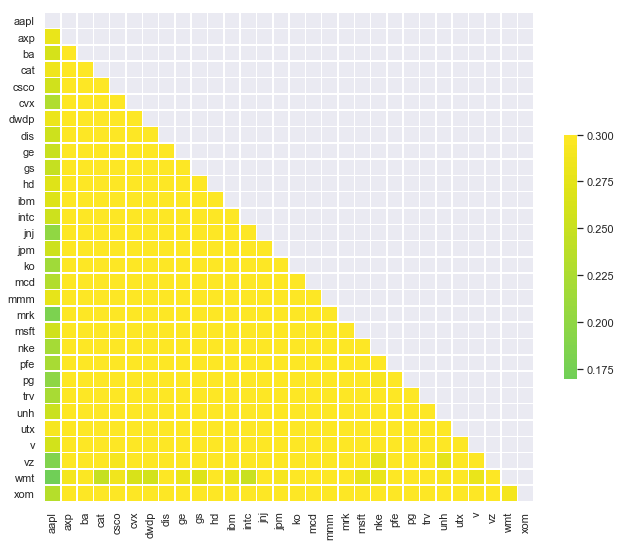

In [39]:
djia_ret = pd.read_pickle('djia_ret.pkl')
djia_corr=djia_ret.corr()
mask=np.zeros_like(djia_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(djia_corr, mask=mask, cmap='viridis', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 4 - Scatter Plot - Rock vs. Alternative and Punk vs. Heavy Metal

In [20]:
auto = pd.read_pickle('./auto.pkl')
print(auto.describe())
auto.head()

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


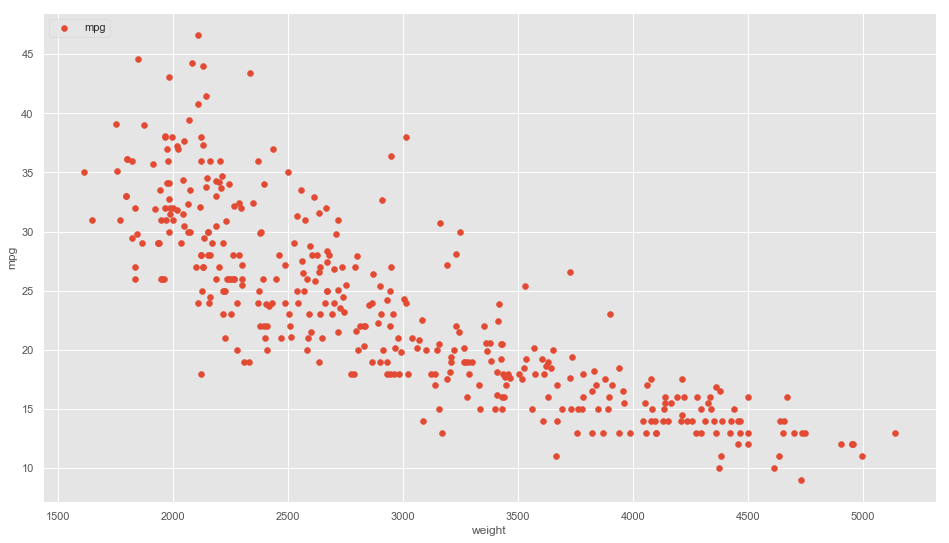

In [21]:
plt.scatter(auto["weight"],auto["mpg"])
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend(loc=2)
plt.show()

## 5 Ranking - Most Popular Genre

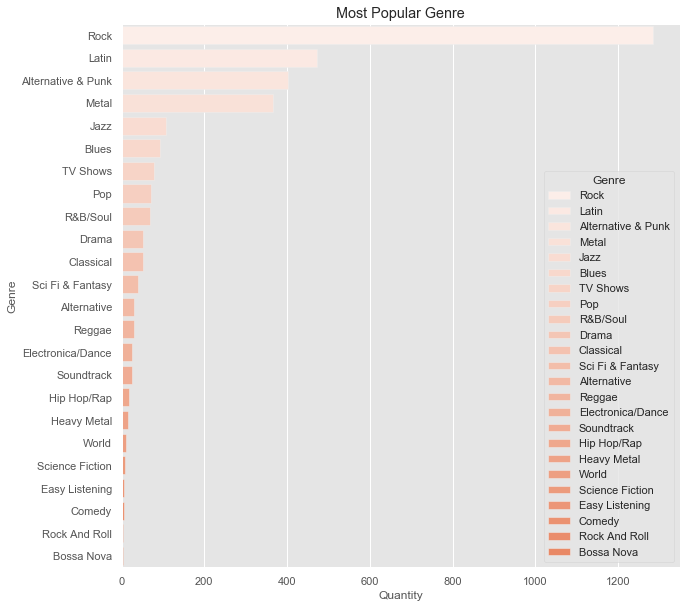

In [22]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x="Quantity", y="Genre", color = 'coral', hue = 'Genre', data=sales_sort_index, dodge=False)
#label = 'Top Selling Genre: Rock\n Quantity: 1284'
#plt.text(x=sales_sort_index.Quantity, y=sales_sort_index.Genre, s=label, size = 10)
plt.xlabel('Quantity')
plt.ylabel('Genre')
plt.title('Most Popular Genre');

I liek the legend and the bar chart in Question 1. However, there are too many non-data ink in this figure. Therefore,I change it to a single color

## 6 - Stacked bar chart - Top 20 Artist in Asia& Europe

In [23]:
artist_groupby = region_filter.groupby('Artist')['Quantity'].sum().to_frame()
artist_sort=artist_groupby.sort_values(by='Quantity', ascending=False)

artist_sort_index =artist_sort.reset_index()
top20 = artist_sort_index.iloc[0:20]
top20

,Artist,Quantity
0,Iron Maiden,223
1,U2,190
2,Led Zeppelin,150
3,Metallica,107
4,Creedence Clearwater Revival,78
5,Lost,76
6,Queen,67
7,Faith No More,65
8,TitÃ£s,65
9,Van Halen,56


In [24]:
top20_artist = top20['Artist']
#check if top20_artist is in music_sales
music_sales_20=region_filter['Artist'].isin(top20_artist)
final1= region_filter[music_sales_20]
final2=final1.groupby(['Artist', 'Genre'])['Quantity'].sum().to_frame().reset_index()


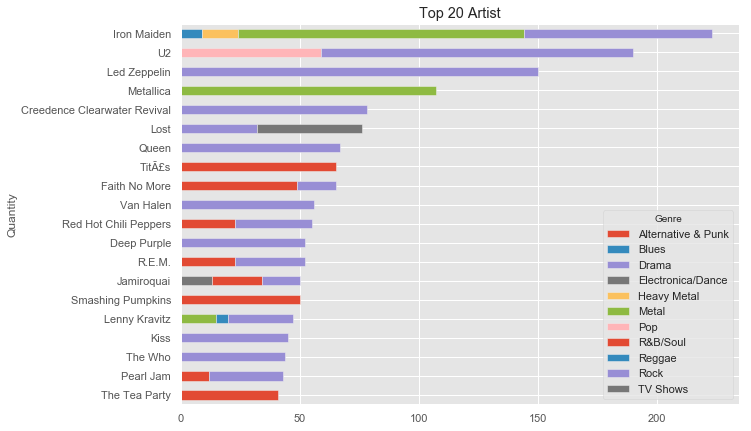

In [25]:
# pivot the table artist as index (row) and genre as column and the counts as the value. 
# if there's any null value, fill them as 0
final_pivot = final2.pivot_table(index=['Artist'], columns=['Genre'],values='Quantity', aggfunc = "sum", margins= True, fill_value=0)

#final_pivot['sum'] = final_pivot.sum(axis = 1)
final_pivot1 = final_pivot.sort_values(by='All', ascending = False).iloc[1:21,:-1]
#final_pivot = final_pivot.sort_values(by='sum', ascending = False).iloc[0:20,:-1]
# decrease the number of columns
# only keep column with numbers. drop all columns with all 0
#final_pivot = final_pivot.loc[:,(final_pivot!= 0).any(axis=0)]
#final_pivot.loc[:, final2.Genre.drop_duplicates()].plot(kind='bar', stacked=True, figsize=(15,7))

final_pivot1[::-1].plot(kind='barh', stacked=True, figsize=(10,7))

plt.ylabel('Quantity')
plt.title('Top 20 Artist');

## 7 - PairPlot - Compare the Sales, Quantity, and Number of Records

In [26]:
df_country1= df.groupby(['Region','Country']).sum().reset_index()

df_country1

,Region,Country,Sales,CustomerID,InvoiceID,Milliseconds,Number of Records,Quantity,UnitPrice,RSales
0,Asia,India,210.91,4092,14043,23721521,70,209,71.30,210.91
1,Europe,Austria,123.89,266,6706,22499454,38,111,42.62,123.89
2,Europe,Belgium,101.97,248,6065,8293259,31,103,30.69,101.97
3,Europe,Czech Republic,269.72,408,18451,51708597,74,228,88.26,269.72
4,Europe,Denmark,112.86,342,8785,10341266,38,114,37.62,112.86
5,Europe,Finland,136.77,1672,9856,21317642,38,123,41.62,136.77
6,Europe,France,562.50,7706,38833,69524978,188,550,193.12,562.50
7,Europe,Germany,421.88,3988,21321,52027456,142,412,146.58,421.88
8,Europe,Hungary,168.61,1710,6972,22843283,38,139,45.62,168.61
9,Europe,Ireland,125.93,1380,6143,21673768,30,107,35.70,125.93


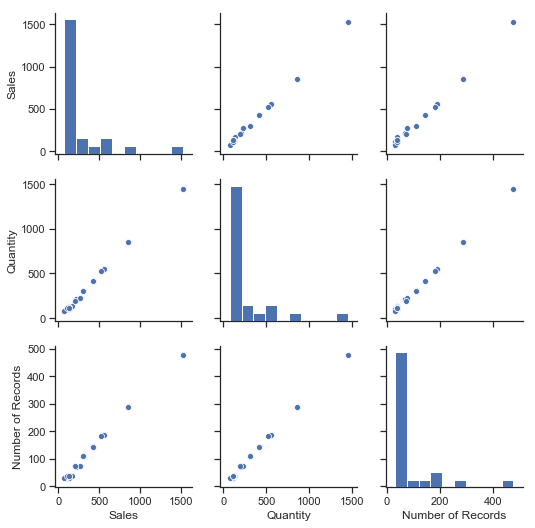

In [27]:

sns.set(style='ticks')
sns.pairplot(df_country1.loc[:,['Sales', 'Quantity', 'Number of Records']])

## 8 Histogram

In [28]:
credit = pd.read_pickle("./credit.pkl")
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


number in each bin:  [138.  45.  53.  47.  48.  32.  21.  11.   3.   2.] 
Cutpoint:  [   0.   199.9  399.8  599.7  799.6  999.5 1199.4 1399.3 1599.2 1799.1
 1999. ]


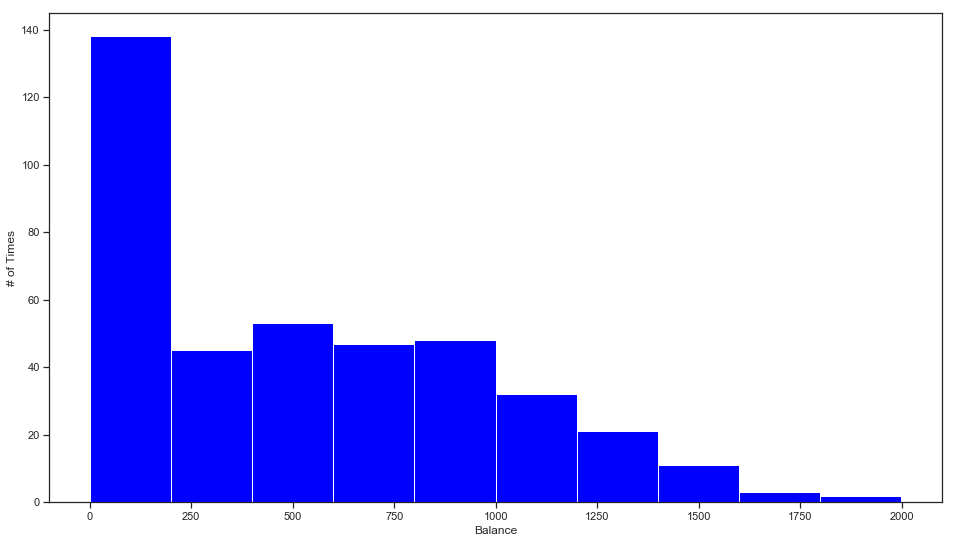

In [29]:
n, bins, patches =plt.hist(x=credit.Balance, color='blue')
plt.ylabel('# of Times')
plt.xlabel('Balance')

print("number in each bin: ", n,
     "\nCutpoint: ", bins)

## 9 Boxplot

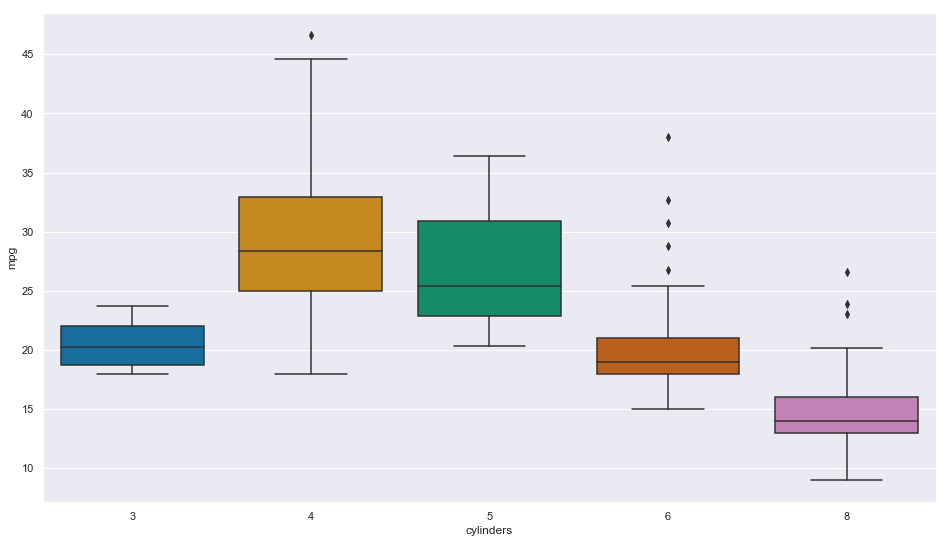

In [30]:
sns.set(style="darkgrid", palette="colorblind")
sns.boxplot(x="cylinders",y="mpg", data=auto)

## 10 Violin Plot

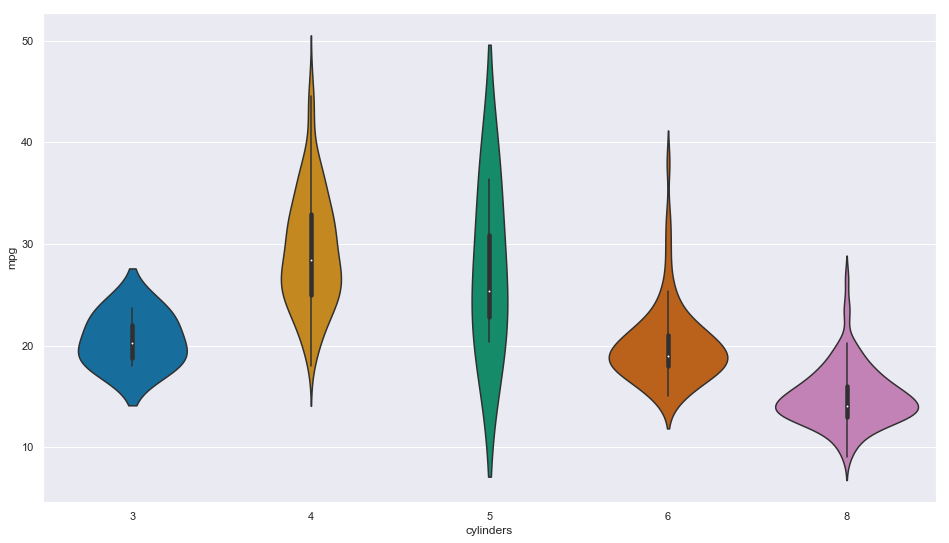

In [31]:
sns.violinplot(x = "cylinders", y="mpg", data=auto)

## 11 Pie Chart

In [32]:
region = df.groupby(['Region']).sum()
region

,Sales,CustomerID,InvoiceID,Milliseconds,Number of Records,Quantity,UnitPrice,RSales
Region,,,,,,,,
Asia,210.91,4092,14043,23721521,70,209,71.30,210.91
Europe,3204.44,35236,209686,410079748,1019,3056,1067.81,3204.44
North America,2378.96,17235,154532,267993434,766,2304,792.34,2378.96
Oceania,73.26,1650,5455,8905259,30,74,29.70,73.26
South America,766.59,5933,56032,91239431,258,741,266.42,766.59


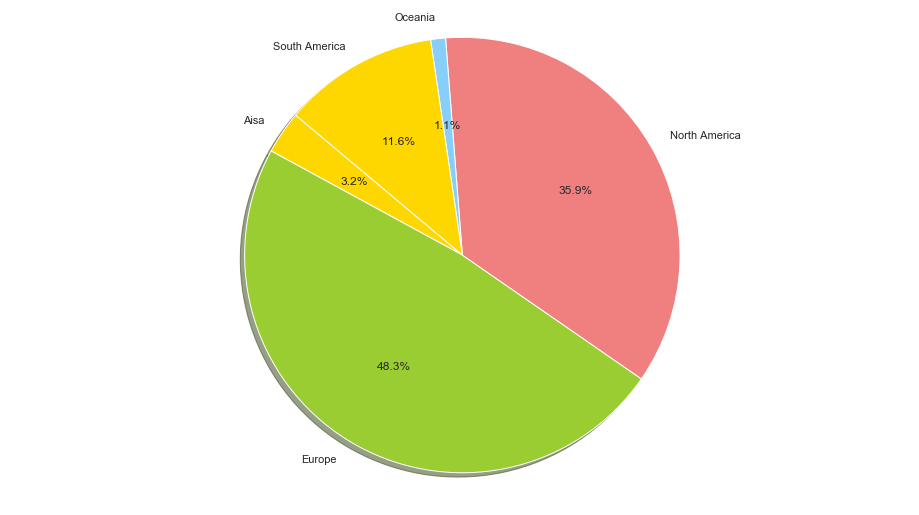

In [33]:
# Data to plot
labels = 'Aisa', 'Europe', 'North America', 'Oceania', 'South America'
sizes = [210.91, 3204.44, 2378.96, 73.26, 766.59]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()